In [9]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

In [10]:
tokenizer = AutoTokenizer.from_pretrained("speakleash/Bielik-4.5B-v3")

'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: dc3a18bf-7b8d-4082-b463-3673446d92ff)')' thrown while requesting HEAD https://huggingface.co/speakleash/Bielik-4.5B-v3/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].


In [12]:
def tokenize(text: str, tokenizer) -> dict:
    encoded_examples = tokenizer(
        text,
        return_tensors="pt",
    )
    return encoded_examples

In [2]:
dataset_dict = load_dataset("jziebura/polish_youth_slang_classification")

In [3]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['słowo slangowe', 'znaczenie wyrazów slangowych', 'źródło', 'powiązana data', 'tekst', 'sentyment'],
        num_rows: 4337
    })
    validation: Dataset({
        features: ['słowo slangowe', 'znaczenie wyrazów slangowych', 'źródło', 'powiązana data', 'tekst', 'sentyment'],
        num_rows: 542
    })
    test: Dataset({
        features: ['słowo slangowe', 'znaczenie wyrazów slangowych', 'źródło', 'powiązana data', 'tekst', 'sentyment'],
        num_rows: 543
    })
})

In [4]:
df_train = dataset_dict["train"].to_pandas()
df_validation = dataset_dict["validation"].to_pandas()
df_test = dataset_dict["test"].to_pandas()

In [5]:
def plot_label_distribution(df, label_column, title="Label Distribution"):
    label_counts = df[label_column].value_counts()
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Counts")
    plt.xticks(rotation=0)
    plt.show()
    label_percentages = (label_counts / label_counts.sum()) * 100
    print("Label Percentages:")
    print(label_percentages)


def plot_text_length_distribution(df, text_column, use_stripped_length=True, title="Text Length Distribution"):
    if use_stripped_length:
        text_lengths = df[text_column].apply(lambda x: len(x.strip()))
    else:
        text_lengths = df[text_column].apply(len)

    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins=30, edgecolor="black")
    plt.title(title)
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.show()
    print(f"Average text length: {text_lengths.mean():.2f}")
    print(f"Median text length: {text_lengths.median():.2f}")
    print(f"Max text length: {text_lengths.max()}")
    print(f"Min text length: {text_lengths.min()}")
    print(f"Percentage of rows longer than 256 characters: {(text_lengths > 256).mean() * 100:.2f}%")

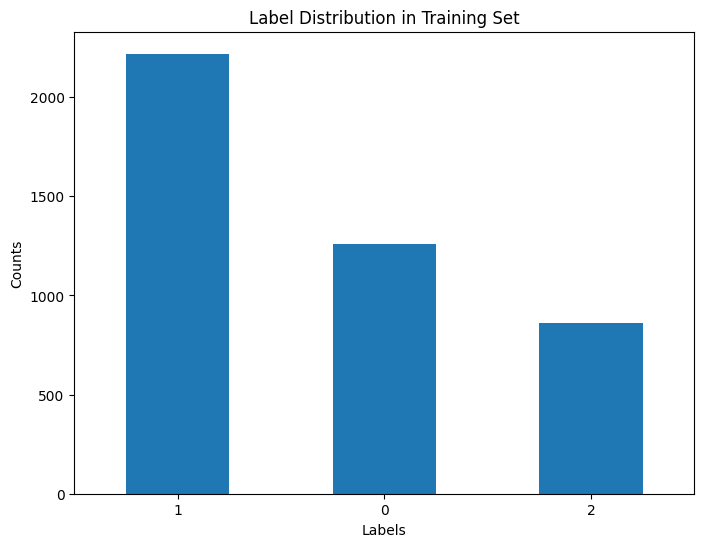

Label Percentages:
sentyment
1    51.164399
0    29.029283
2    19.806318
Name: count, dtype: float64


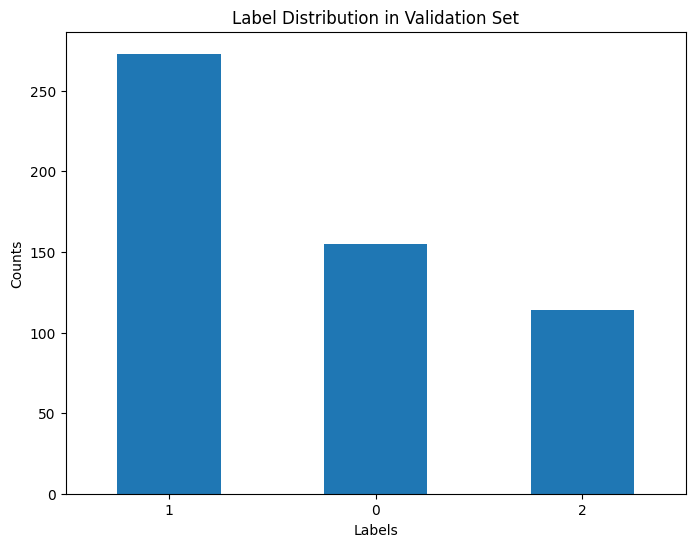

Label Percentages:
sentyment
1    50.369004
0    28.597786
2    21.033210
Name: count, dtype: float64


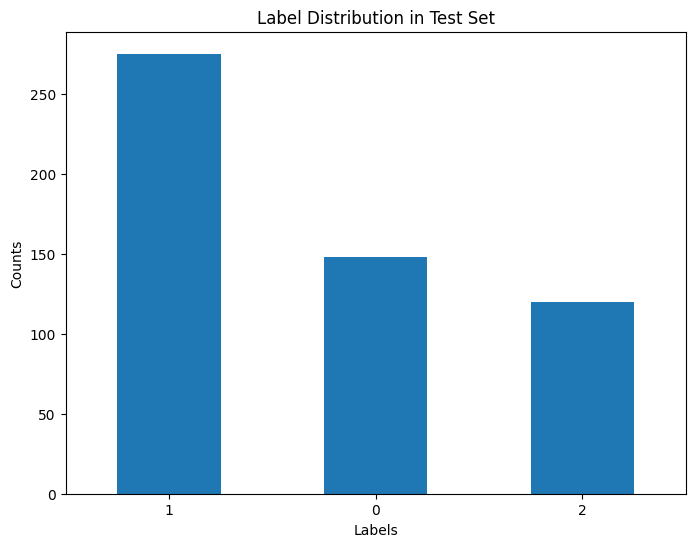

Label Percentages:
sentyment
1    50.644567
0    27.255985
2    22.099448
Name: count, dtype: float64


In [6]:
plot_label_distribution(df_train, "sentyment", title="Label Distribution in Training Set")
plot_label_distribution(df_validation, "sentyment", title="Label Distribution in Validation Set")
plot_label_distribution(df_test, "sentyment", title="Label Distribution in Test Set")

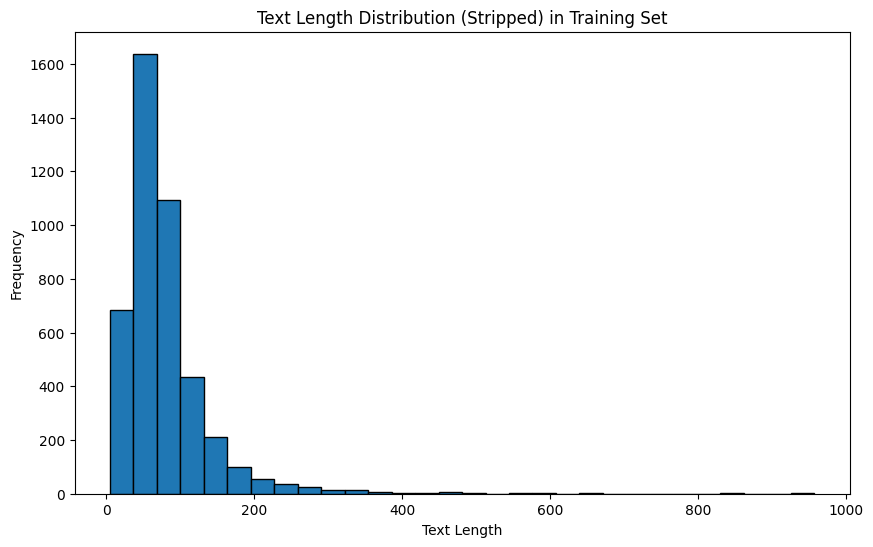

Average text length: 79.08
Median text length: 66.00
Max text length: 957
Min text length: 5
Percentage of rows longer than 256 characters: 1.94%


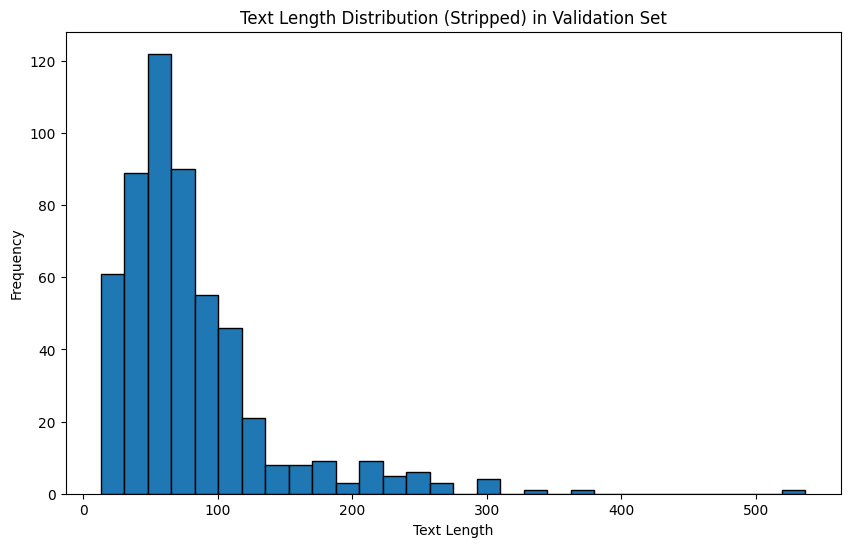

Average text length: 80.05
Median text length: 65.00
Max text length: 537
Min text length: 13
Percentage of rows longer than 256 characters: 1.85%


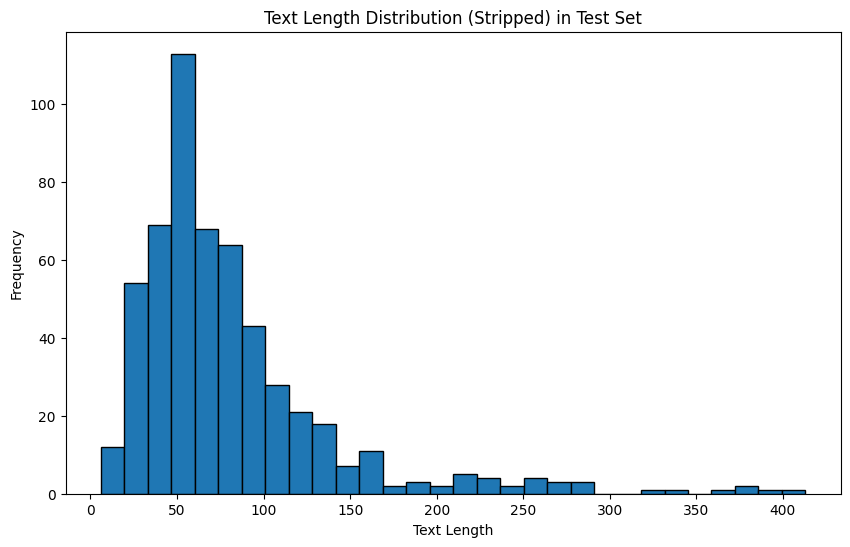

Average text length: 81.30
Median text length: 66.00
Max text length: 413
Min text length: 6
Percentage of rows longer than 256 characters: 2.95%


In [7]:
plot_text_length_distribution(df_train, "tekst", use_stripped_length=True, title="Text Length Distribution (Stripped) in Training Set")
plot_text_length_distribution(df_validation, "tekst", use_stripped_length=True, title="Text Length Distribution (Stripped) in Validation Set")
plot_text_length_distribution(df_test, "tekst", use_stripped_length=True, title="Text Length Distribution (Stripped) in Test Set")

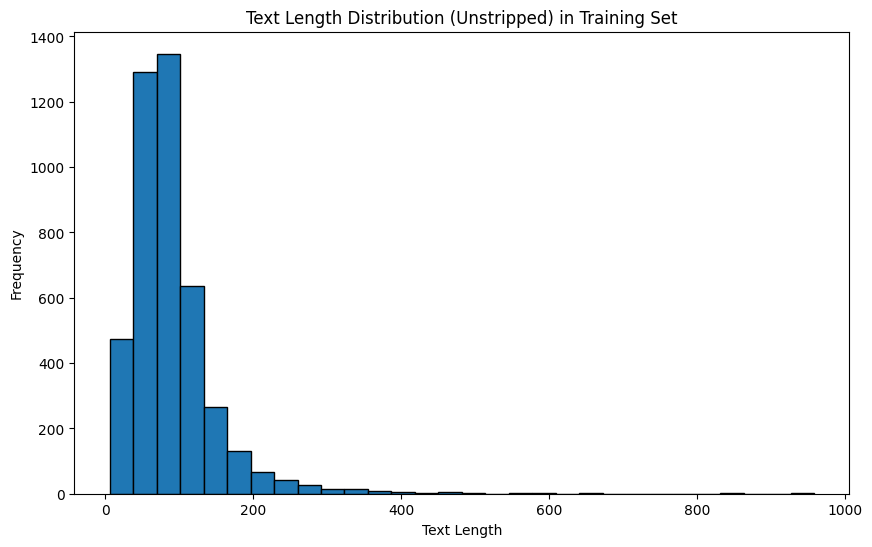

Average text length: 89.34
Median text length: 78.00
Max text length: 958
Min text length: 6
Percentage of rows longer than 256 characters: 2.05%


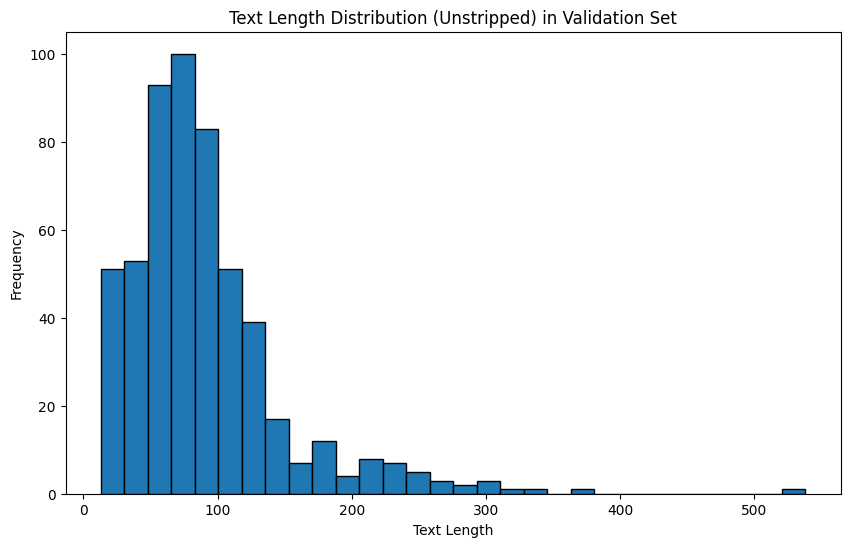

Average text length: 90.12
Median text length: 78.00
Max text length: 538
Min text length: 13
Percentage of rows longer than 256 characters: 2.40%


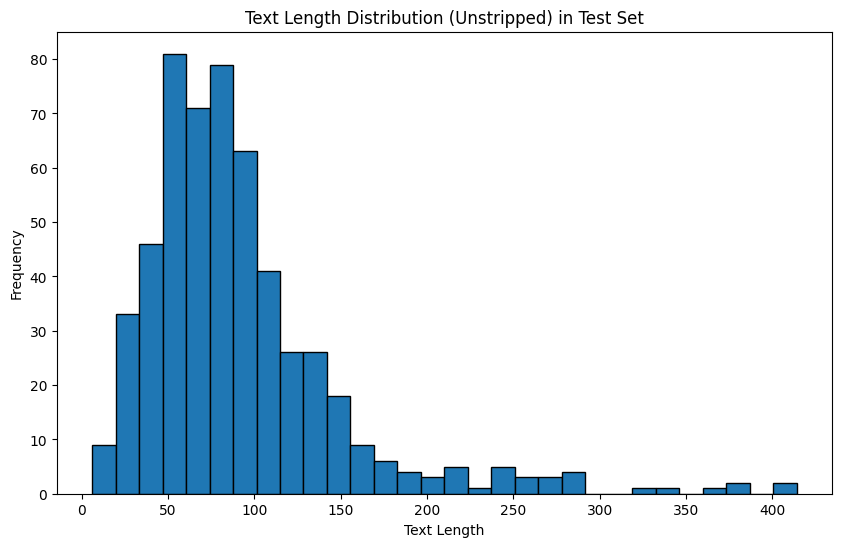

Average text length: 91.60
Median text length: 77.00
Max text length: 414
Min text length: 6
Percentage of rows longer than 256 characters: 2.95%


In [8]:
plot_text_length_distribution(df_train, "tekst", use_stripped_length=False, title="Text Length Distribution (Unstripped) in Training Set")
plot_text_length_distribution(df_validation, "tekst", use_stripped_length=False, title="Text Length Distribution (Unstripped) in Validation Set")
plot_text_length_distribution(df_test, "tekst", use_stripped_length=False, title="Text Length Distribution (Unstripped) in Test Set")

In [14]:
df_train["tokenized_len"] = df_train["tekst"].apply(lambda x: len(tokenize(x, tokenizer)["input_ids"][0]))
df_validation["tokenized_len"] = df_validation["tekst"].apply(lambda x: len(tokenize(x, tokenizer)["input_ids"][0]))
df_test["tokenized_len"] = df_test["tekst"].apply(lambda x: len(tokenize(x, tokenizer)["input_ids"][0]))

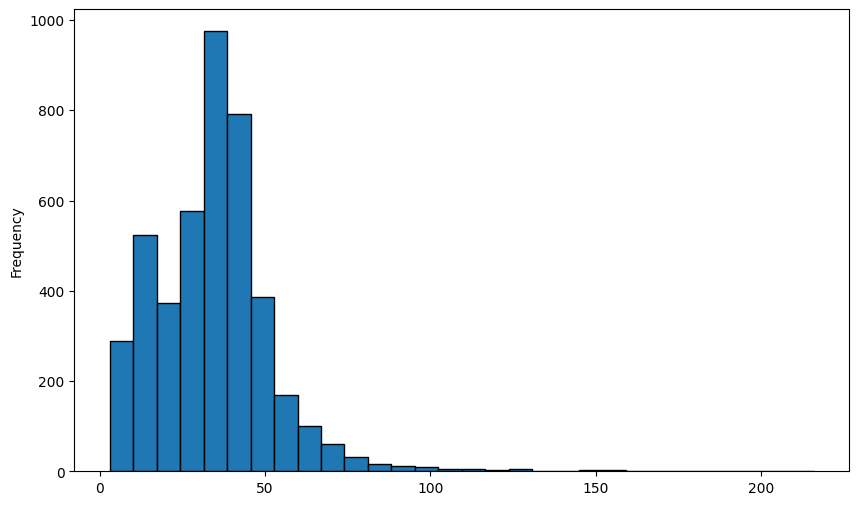

np.int64(216)

In [19]:
df_train["tokenized_len"].plot.hist(bins=30, edgecolor="black", figsize=(10, 6))
plt.show()
df_train["tokenized_len"].max()

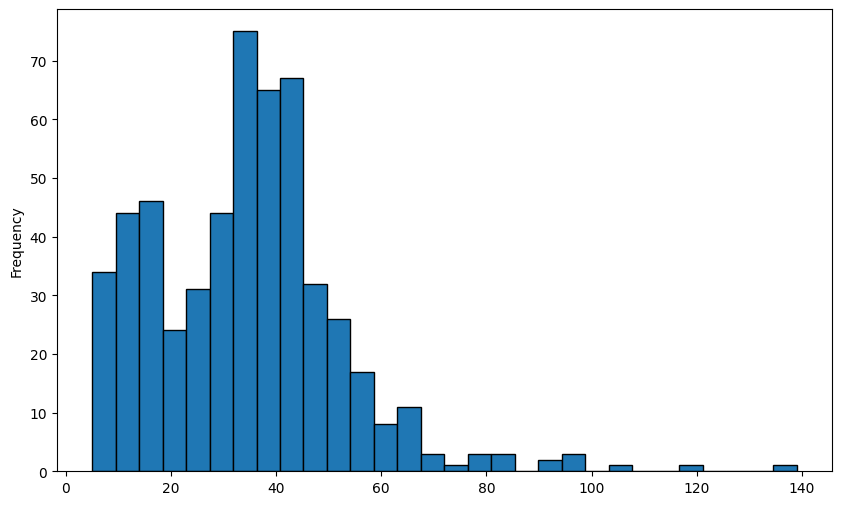

np.int64(139)

In [20]:
df_validation["tokenized_len"].plot.hist(bins=30, edgecolor="black", figsize=(10, 6))
plt.show()
df_validation["tokenized_len"].max()

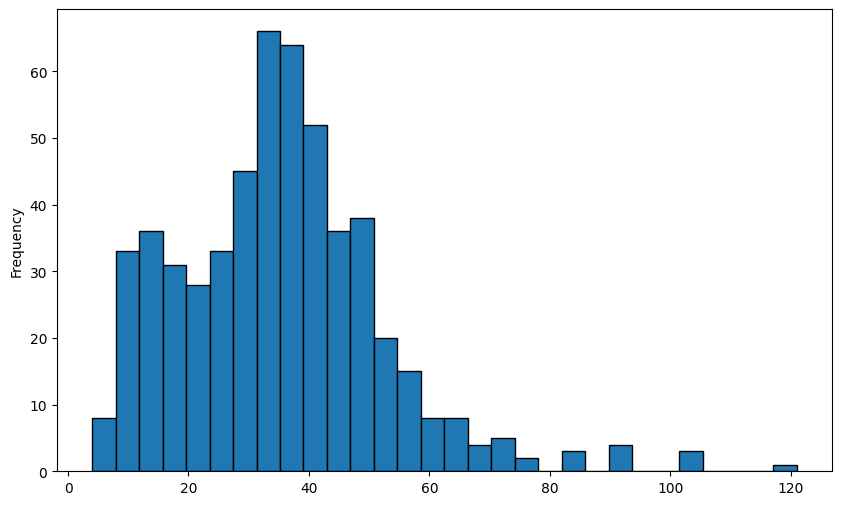

np.int64(121)

In [21]:
df_test["tokenized_len"].plot.hist(bins=30, edgecolor="black", figsize=(10, 6))
plt.show()
df_test["tokenized_len"].max()